- Diego Ferreño Blanco
- Estela Ruiz Martínez
- Gerardo de Miguel González
- Manuel Zamudio López

# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


In [2]:
import xml.etree.ElementTree as ET
import requests
import json
import zipfile

# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>


**COMENTARIO**

El DataSet para la práctica se ha publicado en Zenodo, para ello se ha creado una comunidad para localizar más fácilmente el archivo con los datos, como se sugiere en el enunciado del ejercicio.
- **Communities**: ERM_DFB
- **DataSet**: DataSetBoston

# Publicación de script de Análisis

En Github + Zenodo

**COMENTARIO**

La script se ha publicado en GitHub y en la cuenta Estela85. Con la opción "Release" en GitHub, se cargó el script ".py" en Zenodo, donde automáticamente se guardó en un archivo ".zip".

- **Github**: Estela85/Boston_ERM-DFB

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

**COMENTARIO:**

Hacemos un requests para obtener los identifieres que hacen referencia a la base de datos y al script.

In [3]:
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&set=user-erm_dfb&metadataPrefix=oai_dc') 
Tree = ET.fromstring(oai.text)
iterator = Tree.iter()
for elem in iterator:
    print(elem.tag ,":", elem.text) 

{http://www.openarchives.org/OAI/2.0/}OAI-PMH : 
  
{http://www.openarchives.org/OAI/2.0/}responseDate : 2019-01-17T09:44:07Z
{http://www.openarchives.org/OAI/2.0/}request : https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords : 
    
{http://www.openarchives.org/OAI/2.0/}record : 
      
{http://www.openarchives.org/OAI/2.0/}header : 
        
{http://www.openarchives.org/OAI/2.0/}identifier : oai:zenodo.org:2541808
{http://www.openarchives.org/OAI/2.0/}datestamp : 2019-01-17T01:32:37Z
{http://www.openarchives.org/OAI/2.0/}setSpec : openaire_data
{http://www.openarchives.org/OAI/2.0/}setSpec : user-erm_dfb
{http://www.openarchives.org/OAI/2.0/}metadata : 
        
{http://www.openarchives.org/OAI/2.0/oai_dc/}dc : 
          
{http://purl.org/dc/elements/1.1/}creator : Diego Ferreno
{http://purl.org/dc/elements/1.1/}creator : Estela Ruiz
{http://purl.org/dc/elements/1.1/}date : 2019-01-16
{http://purl.org/dc/elements/1.1/}description : DataSet para la práctica de 

**COMENTARIO**

Al identificador: https://zenodo.org/record/2541808 le añadimos **/api**, https://zenodo.org/api/records/2541808, e indicamos que queremos obtener la respuesta en formato json.

In [4]:
headers={'accept':'application/json'}
r=requests.get('https://zenodo.org/api/records/2541808',headers)

In [11]:
data = json.loads(r.text)

**COMENTARIO** 

Obtenemos la URL, link, donde podemos descargarnos la base de datos Boston.csv

In [6]:
link=data['files'][0]['links']['self']
link

'https://zenodo.org/api/files/4aa84e3a-c504-4924-b7ee-2df3e5026e03/Boston.csv'

**COMENTARIO**

Descargamos el csv en nuestro equipo.

In [7]:
import os
import requests

response = requests.get(link)
with open(os.path.join(".", "Boston.csv"), 'wb') as f:
    f.write(response.content)

# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

**COMENTARIO**

Repetimos el proceso para obtener el fichero con la script.

In [8]:
headers={'accept':'application/json'}
r1=requests.get('https://zenodo.org/api/records/2541986',headers)

In [9]:
data1 = json.loads(r1.text)
link1=data1['files'][0]['links']['self']
#result1=requests.get(link1)
link1

'https://zenodo.org/api/files/e3c1ee73-f694-4200-b596-27ac40529d20/Estela85/Boston_ERM-DFB-1.zip'

In [10]:
response1 = requests.get(link1)
with open(os.path.join(".", "Script1.zip"), 'wb') as f:
    f.write(response1.content)

**COMENTARIO**

"Deszipeamos" el archivo para obtener la script.

In [148]:
import zipfile
with zipfile.ZipFile("Script1.zip","r") as zip_ref:
    zip_ref.extractall(".")

# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

Aquí se muestran los resultados obtenidos del análisis y también se han exportado 2 gráficas en formato png. "Grafica" muestra los valores de y predicho frente a los y reales y la otra muestras la regresión de dos de las variables.

**COMENTARIO**

Con la base de datos y la script en nuestro equipo ya estamos en disposición de lanzar la script y obtener los resultados de la script.

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
5           6  0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3   
6           7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
5  222     18.7  394.12   5.21  28.7  
6  311     15.2  395.60  12.43  22.9  
(506, 15)
(379,)
R-squared score (training): 0.571
R-squared sc

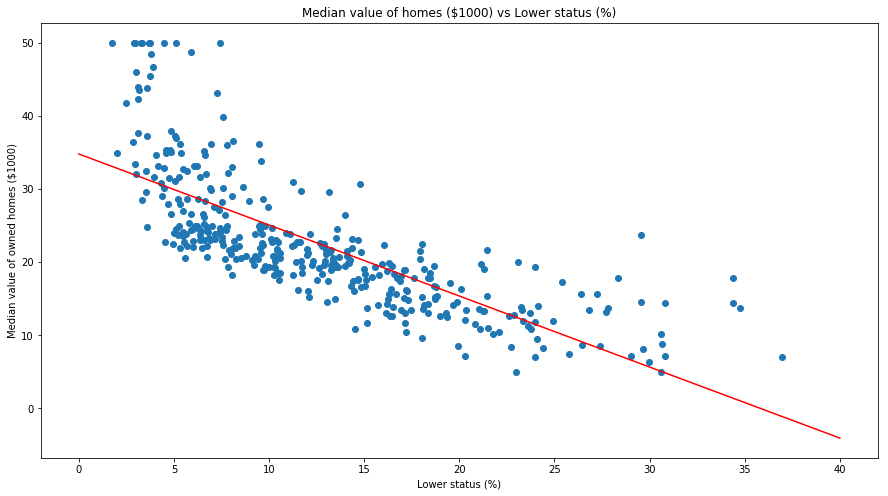

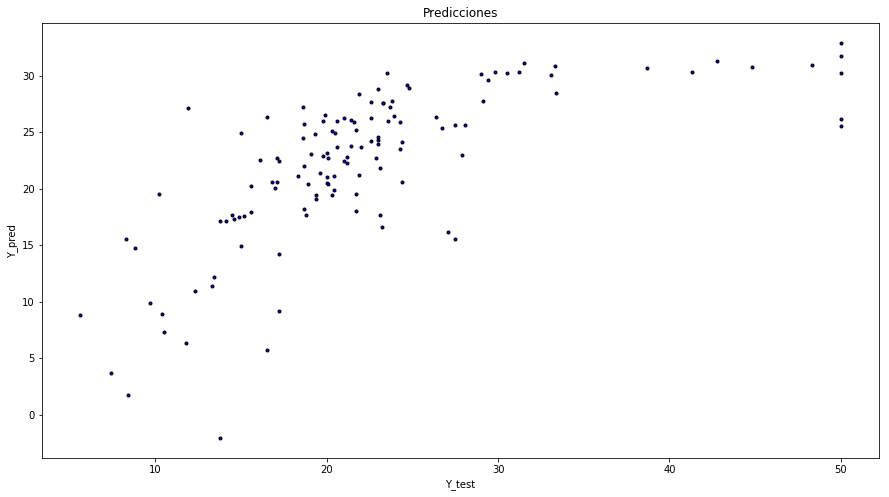

In [13]:
run -i Estela85-Boston_ERM-DFB-0b3fb8f/02_1_Univariate_Regression_dataset_Boston.py Boston.csv

# Publicación de los Datos

Utilizando la API de Zenodo

**COMENTARIO**

Nos faltó tiempo para acabar esta parte.

¿Puedes replicar ese workflow en un sólo bloque con otros datos?